# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# Is the distribution of body temperatures normal?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# Define some function for plotting
def get_sub_plot(label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 5)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_dist(df, bins):
    ax = get_sub_plot()
    sns.distplot(df, ax = ax, bins = bins)
    plt.show()
    
def plot_swarmplot(x, y, df):
    ax = get_sub_plot()
    sns.swarmplot(x = x, y = y, data = df, ax = ax)
    plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
df_temps = df['temperature']
df_temps.mean(), df_temps.median()

(98.24923076923078, 98.3)

In [6]:
df_temps.std(), df_temps.var()

(0.7331831580389454, 0.5375575432319613)

C:\Users\kuna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


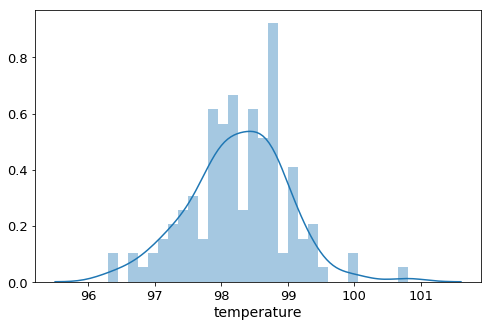

In [7]:
df_temps = df_temps.fillna(df_temps.mean())
plot_dist(df_temps, bins=30)

In [8]:
stats.normaltest(df_temps)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

**Conclusion** : As pvalue is > 0.05 this is indeed a normal distribution

After visualizing the data, we can check normality using ECDF.

In [9]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

def plot_ecdf_with_sample(df_x, xlabel):
    ax = get_sub_plot()
        
    mean = np.mean(df_x)
    std = np.std(df_x)
    samples = np.random.normal(mean, std, size = 10000)
    x_theory, y_theory = ecdf(samples)
    #_ = plt.plot(x_theory, y_theory)
    sns.regplot(x = x_theory, y = y_theory, fit_reg = False, ax = ax)
    
    x, y = ecdf(df_x)
    #_ = plt.plot(x, y, marker = '.', linestyle = 'none')
    sns.regplot(x = x, y = y, fit_reg = False, ax = ax)
    
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('ECDF')
    _ = plt.legend(('Samples', 'Data'))
    plt.margins(0.02)
    plt.show()

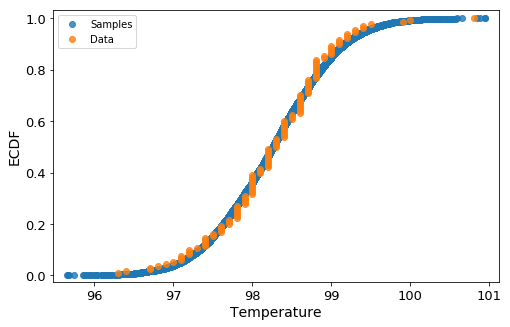

In [10]:
plot_ecdf_with_sample(df_temps, xlabel = 'Temperature')

# Is the sample size large? Are the observations independent?

For a large sample size (rule of thumb: n ≥ 30), the data is approximately normally distributed, regardless of
the distribution of the population one samples from

We have 130 data points, hence is considered large sample size.

**Are the observations independent?**

And yes, observations of blood temperatures, gender & heart rate of an individual human, which does not depend on each other, should be independent.

# Is the true population mean really 98.6 degrees F?

**Null Hypothosis**: True Population mean is 98.6 degrees F

**Alternate Hypothosis**: True Population mean is not 98.6 degrees F

**Test Statistic**: Mean of body temperature

**Approach-1: Bootstrap Test**

In [11]:
def diff_shift(data, temperature = 98.6):
    return np.mean(data) - 98.6

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# Function to create bootstrap replicates
def draw_bs_reps(data, func, size=1):
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Calculate mean diff for original mean
diff_obs = diff_shift(df_temps)

# Translate sample means to observed mean 
df_shifted_temps = df_temps - np.mean(df_temps) + 98.6

# Generate replicated samples
bs_replicates = draw_bs_reps(df_shifted_temps, diff_shift, 10000)

# Calculate p-value
p_value = np.sum(bs_replicates <= diff_obs) / len(bs_replicates)
p_value

0.0

**Conclusion from Approach-1** : p-value is < 0.05 hence we can conclude that the population mean of human body temperature is **NOT** 98.6 F

**Approach-2: One Sample Test**

We chose **one-sample** test as a single sample distribution of human body temperature is made available

Here, 130 samples are available which is > 30 hence more appropriate to use **z-score**

In [12]:
t_mean = 98.6
s_mean = df_temps.mean()
s_std = df_temps.std()


In [13]:
s_var = s_std/np.sqrt(len(df))
s_mean, s_std, s_var

(98.24923076923078, 0.7331831580389454, 0.06430441683789101)

Lets calculate **z-score** to check how many standard deviations away is 98.6 (t_mean) from 98.25 (s_mean).

In [23]:
z = (98.6 - s_mean) / s_var
z

5.454823292364079

In [24]:
p = (1-stats.norm.cdf(z))*2
p

4.902157013653152e-08

In [25]:
p = stats.norm.sf(z)*2
p

4.90215701411338e-08

**Conclusion from Approach-2 with Z-score test** : p-value is < 0.05 hence we can conclude that the population mean of human body temperature is **NOT** 98.6 F

Lets calculate **t-statistic** to check how many standard deviations away is 98.6 (t_mean) from 98.25 (s_mean).

In [17]:
t = z
p_val = (1 - stats.t.cdf(t, len(df)-1))*2
p_val

2.4106320428707306e-07

**Conclusion from Approach-2 with T-score test** : p-value is < 0.05 hence we can conclude that the population mean of human body temperature is *NOT* 98.6 F

# Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [18]:
s_sample = np.random.choice(df_temps, 10)

In [19]:
# Calculate mean diff for original mean
diff_obs = diff_shift(s_sample)

# Translate sample means to observed mean 
df_shifted_s_sample = s_sample - np.mean(s_sample) + 98.6

# Generate replicated samples
bs_replicates_s = draw_bs_reps(df_shifted_s_sample, diff_shift, 10000)

# Calculate p-value
p_value = np.sum(bs_replicates_s <= diff_obs) / len(bs_replicates_s)
p_value

0.0032

In [20]:
from statsmodels.stats.weightstats import ztest
ztest(x1 = s_sample, value = 98.6)

(-2.669964956939846, 0.007585916360356623)

In [21]:
from scipy.stats import ttest_1samp
ttest_1samp(s_sample, 98.6)

Ttest_1sampResult(statistic=-2.669964956939846, pvalue=0.025623927634854937)

**Conclusion** for small sample T-statistic Test gived better result than Z-score based test.

# At what temperature should we consider someone's temperature to be "abnormal"?

In [27]:
# Bootstrap approach
bs_replicates = draw_bs_reps(df_temps, np.mean, 10000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([98.12153846, 98.37384615])

In [30]:
# Frequentist approach 
from scipy.stats import norm
import math

z_value = 1.96
mean = np.mean(df_temps)
std = np.std(df_temps)
std_err = std / math.sqrt(len(df_temps))
margin_of_err = z_value * std_err

conf_int = (mean - margin_of_err, mean + margin_of_err)
conf_int

(98.12367980442819, 98.37478173403336)

**Conclusion:** :The 95% confidence interval lies between 98.124 and 98.374, temperature outside this range can be considered "abnormal".

# Is there a significant difference between males and females in normal temperature?

**Two-Sample Testing** method to be used here as samples from two different groups (male/female) are to be considered for analysis.

Visualize swarmplot of females temperatures vs. male temperatures first:

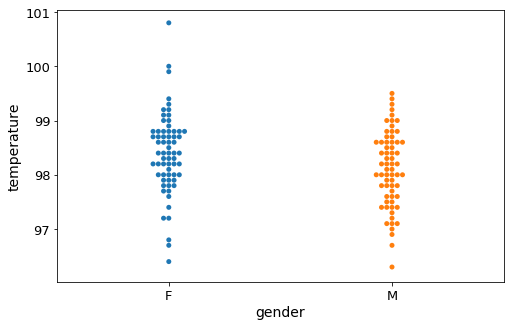

In [32]:
plot_swarmplot(x = 'gender', y = 'temperature', df = df)

Visualize using ECDF 

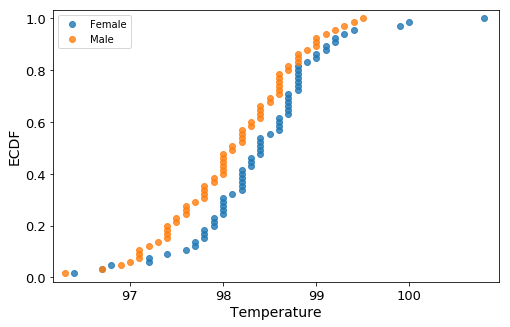

In [33]:
def plot_ecdf_2sam(df_1, df_2, xlabel, legend):    
    ax = get_sub_plot()
    
    x1, y1 = ecdf(df_1)
    sns.regplot(x = x1, y = y1, fit_reg = False, ax = ax)
    x2, y2 = ecdf(df_2)
    sns.regplot(x = x2, y = y2, fit_reg = False, ax = ax)
    
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('ECDF')
    _ = plt.legend(legend)
    plt.margins(0.02)
    plt.show()
    
male_t = df[df.gender == 'M']['temperature']
female_t = df[df.gender == 'F']['temperature']

plot_ecdf_2sam(female_t, male_t, xlabel = 'Temperature', legend = ('Female', 'Male'))

Plots indicated the male & female boday temperature means are indeed different, lets cross-check same using sampling techniques

In [34]:
print(male_t.describe())
print(female_t.describe())

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64
count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64


Based on swarmplot & ECDF & describe function, looks like male temperatures and female temperatures are quite different.

Let's test using Two-Sample Test:

**Null Hypothosis:** Males and Females have same Mean Temperature.

**Alternate Hypothosis:** Males and Females do not have same Mean Temperature.

**Test Statistic:** Difference of Mean of Male Body Temperature & Mean of Female Body Temperature.

**Test-1 : Using Permutation Test on Bootstrap Replicates** 

In [35]:
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size = 1):
    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)

empirical_diff_means = diff_of_means(female_t, male_t)

perm_replicates = draw_perm_reps(female_t, male_t, 
                                 diff_of_means, size = 10000)

p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
p

0.0114

**Test-2 : Using Two-Sample Test** 

Statistics for Male body temperature

In [40]:
male_mean = male_t.mean()
male_std = male_t.std()

male_mean, male_std

(98.1046153846154, 0.6987557623265908)

Statistics for Male body temperature

In [42]:
female_mean = female_t.mean()
female_std = female_t.std()

female_mean, female_std

(98.39384615384613, 0.7434877527313665)

From the above calculations, it can be seen that the mean and the standard deviations of male and female temperatures differ slightly. The next step is to determine if this difference is a statistically significant one.

In [44]:
org_mean_diff = 0
sample_mean_diff = female_mean - male_mean
sample_sigma_diff = np.sqrt((female_std**2)/len(female_t)  + (male_std**2)/len(male_t))
sample_mean_diff, sample_sigma_diff

(0.289230769230727, 0.12655395041982642)

In [45]:
zscore = (sample_mean_diff - org_mean_diff) / sample_sigma_diff
zscore

2.285434538165274

In [47]:
p_value = (1-stats.norm.cdf(zscore))*2
p_value

0.022287360760677277

**Conclusion:** As p value of both tests are very small (0.011 & 0.022), we can reject the null hypothosis. Therefore, there is a significant difference between males and females in normal temperature.